## Life expectancy
description of the project

### What's the effect of lifestyle factors?

### What public health interventions have the most significant impact?

### What impact has economic development?


### Data understanding

## Access

In [51]:
#import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Data understanding

We'll take a look at the data 

In [52]:
#check the data 
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [53]:
#Print the columns of the dataset
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [54]:
#check descriptive statistics 
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


We'll use the unique() method to see some of the countries that will be part of this analysis.

In [55]:
#Check the unique values from the Country columns
df['Country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

## Data preparation

Before any analysis, we'll do some cleaning first.

We'll check the datatype of each column and see whether that column has null values or not.

In [56]:
#Print the number of nulls and the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

It is hard to identify the columns that have null values, so we'll iterate each column to get the number of null values and then sort them to print the columns with the higher number of null values first. 

In [57]:
#number of null values for each column
def count_nulls(dataset):
    '''
    This function counts the null values from all the columns of a dataset.
    
    Input:
    dataset
    
    Output:
    Columns with the number of null values
    
    '''
    null_counts = {}

    for column in dataset.columns:
        null_counts[column] = df[column].isnull().sum()

    sorted_null_counts = dict(sorted(null_counts.items(), key=lambda x: x[1], reverse=True))

    for column, null_count in sorted_null_counts.items():

        print(f"'{column}' has {null_count} null values.")

count_nulls(df)

'Population' has 652 null values.
'Hepatitis B' has 553 null values.
'GDP' has 448 null values.
'Total expenditure' has 226 null values.
'Alcohol' has 194 null values.
'Income composition of resources' has 167 null values.
'Schooling' has 163 null values.
' BMI ' has 34 null values.
' thinness  1-19 years' has 34 null values.
' thinness 5-9 years' has 34 null values.
'Polio' has 19 null values.
'Diphtheria ' has 19 null values.
'Life expectancy ' has 10 null values.
'Adult Mortality' has 10 null values.
'Country' has 0 null values.
'Year' has 0 null values.
'Status' has 0 null values.
'infant deaths' has 0 null values.
'percentage expenditure' has 0 null values.
'Measles ' has 0 null values.
'under-five deaths ' has 0 null values.
' HIV/AIDS' has 0 null values.


To get a better view of the values, we'll make a plot of the columns with null values.

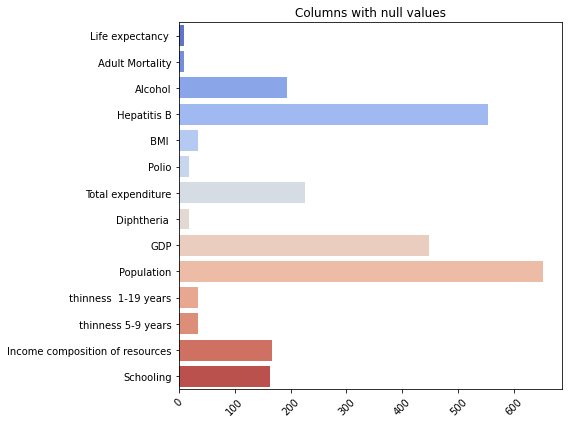

In [58]:
#Plot of the columns with null values
null_counts = df.isnull().sum() 

columns_with_nulls = null_counts[null_counts > 0]


plt.figure(figsize=(8, 6))
sns.barplot(x=columns_with_nulls.values, y=columns_with_nulls.index, palette='coolwarm')
plt.title('Columns with null values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We already know that some columns have nulls, so it is important to decide what to do with those values. In this case, the means will be used to fill these gaps, since we want to preserve the relationships between variables.

In [59]:
#Fill null values with the mean of the column (only to the columns with numerical values)

numeric_columns = df.select_dtypes(include=['number'])
column_means = numeric_columns.mean()

for column in df.columns[df.isnull().any()]:
    df[column].fillna(column_means[column], inplace=True)

Once it's done, we'll use the function count_nulls() to check if any of the columns still have any null values.

In [60]:
#Check if the dataset has null values
count_nulls(df)

'Country' has 0 null values.
'Year' has 0 null values.
'Status' has 0 null values.
'Life expectancy ' has 0 null values.
'Adult Mortality' has 0 null values.
'infant deaths' has 0 null values.
'Alcohol' has 0 null values.
'percentage expenditure' has 0 null values.
'Hepatitis B' has 0 null values.
'Measles ' has 0 null values.
' BMI ' has 0 null values.
'under-five deaths ' has 0 null values.
'Polio' has 0 null values.
'Total expenditure' has 0 null values.
'Diphtheria ' has 0 null values.
' HIV/AIDS' has 0 null values.
'GDP' has 0 null values.
'Population' has 0 null values.
' thinness  1-19 years' has 0 null values.
' thinness 5-9 years' has 0 null values.
'Income composition of resources' has 0 null values.
'Schooling' has 0 null values.


Now we're sure that there are no null values left, so we can continue with the cleaning.

In [61]:
#Droping columns
df.drop(['Country','infant deaths','Year'], axis=1, inplace=True)

#Data set that will be used for plotting

plot_df = df.copy()

We'll use machine learning algorithms to predict life expectancy, but that column is categorical, so we'll one hot encoded it because the models we'll use require a numerical input.

In [62]:
#One hot encode the status column
one_hot_encoded = pd.get_dummies(df['Status'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop(['Status'], axis=1, inplace=True)

In [63]:
#View the new columns created
df.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


## Modeling

Two models were chosen to predict life expectancy in people. The first one is a Linear Regression model. This model was chosen since it is good at predicting the value of a dependent variable based on many independent variables, and it helps to model complex relationships.

The other model used is Random Forest Regressor. It was chosen because it can capture non-linear relationships between the input features and the target variable. This algorithm tends to provide high prediction accuracy compared to other regression algorithms. This can be accomplished because of multiple decision trees that help reduce overfitting and improve performance.

The first step is to split the data. One portion will be used to train the model and the other to test it. 

In [64]:
#Split the data
X = df.drop(['Life expectancy '], axis=1)
y = df['Life expectancy ']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Once the we've split the data we'll create the Linear Regression algorith and train it. 

In [65]:
#Linear regresion model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse,2))
linear_model.score(X_test,y_test)

Mean Squared Error: 16.25


0.8124184451523002

We'll use the same steps for the Random Forest Regressor

In [66]:
#Random forest model
rf=RandomForestRegressor()

random_forest=rf.fit(X_train,y_train)

y_forest_pred = random_forest.predict(X_test)
forest_mse = mean_squared_error(y_test, y_forest_pred)


print("Mean Squared Error Random Forest: ", round(forest_mse,2))
random_forest.score(X_test,y_test)

Mean Squared Error Random Forest:  2.85


0.96711891071949

## Analyze the data 

We aim to answer critical questions such as: What are the primary features involved in life expectancy? 

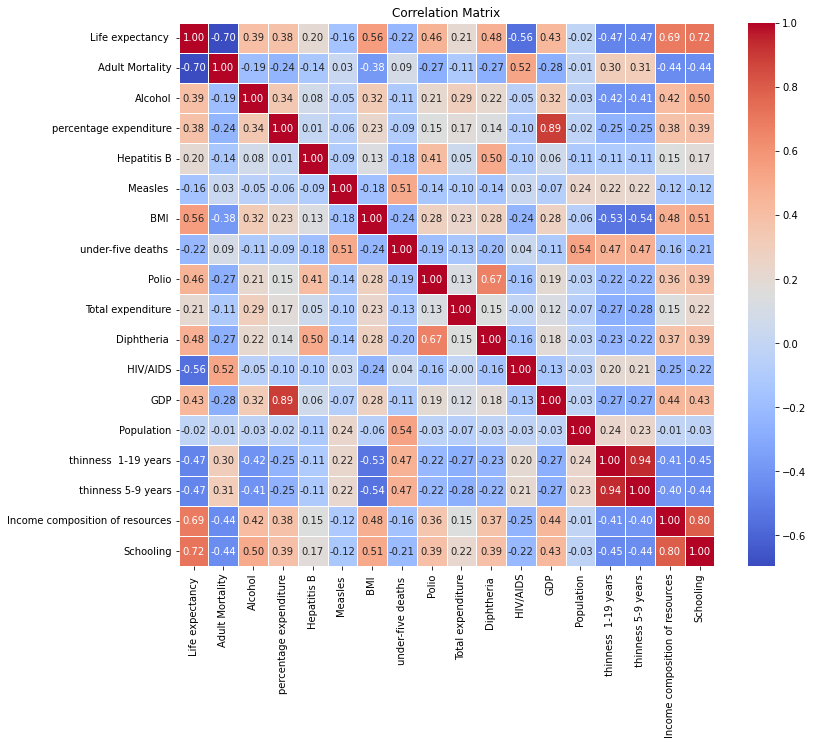

In [67]:


#Correlation matrix
correlation_matrix = plot_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

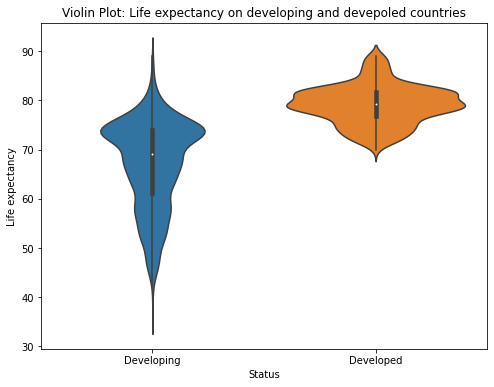

In [68]:
#Violin Plot comparing the life expectancy between depeloped and developing countries
plt.figure(figsize=(8, 6))
sns.violinplot(x="Status", y="Life expectancy ", data=plot_df)
plt.title("Violin Plot: Life expectancy on developing and devepoled countries")
plt.xlabel("Status")
plt.ylabel("Life expectancy")
plt.show()

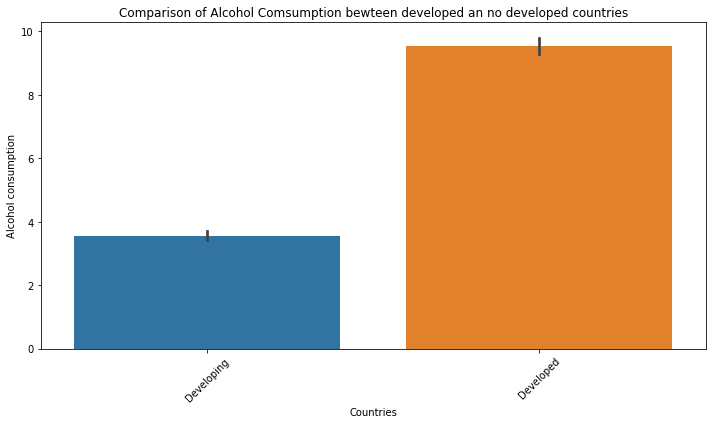

In [69]:
#Bar plot to compare the consumption of alcohol in developed and developing countries

plt.figure(figsize=(10, 6)) 
sns.barplot(x='Status', y='Alcohol', data=plot_df)


plt.xlabel('Countries')
plt.ylabel('Alcohol consumption')
plt.title('Comparison of Alcohol Comsumption bewteen developed an no developed countries')

# Displaying the plot
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

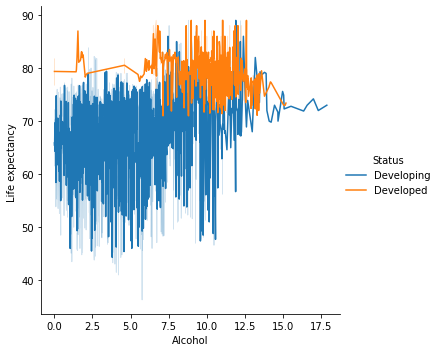

In [70]:
#Plot of the relationship between life expectancy, alcohol consumption and status
plt.figure(figsize=(10, 6)) 
sns.relplot(data=plot_df, kind="line",x="Alcohol", y="Life expectancy ", hue="Status",)

plt.show()

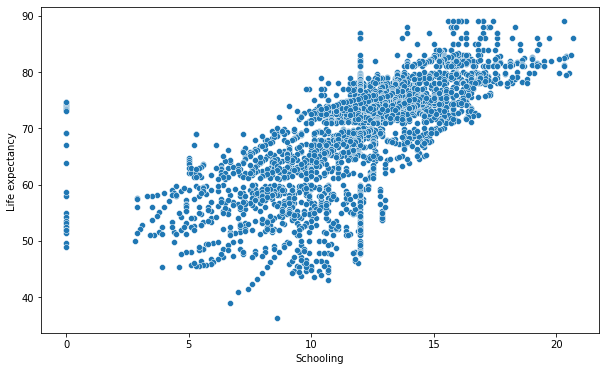

In [71]:
#Scatter plot to show the relationship between schooling and life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=plot_df)

plt.show()

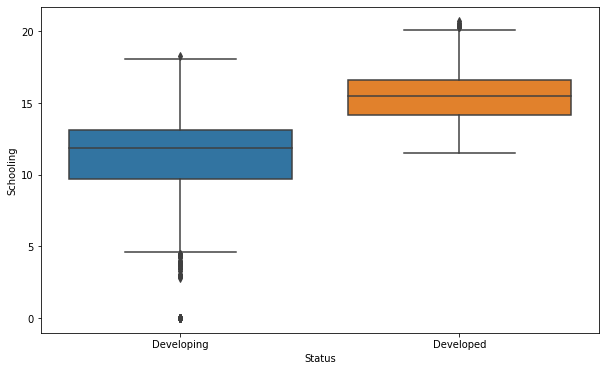

In [72]:
#Box plot to show schooling in developed and developing countries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Schooling', data=plot_df)

plt.show()

<Figure size 720x432 with 0 Axes>

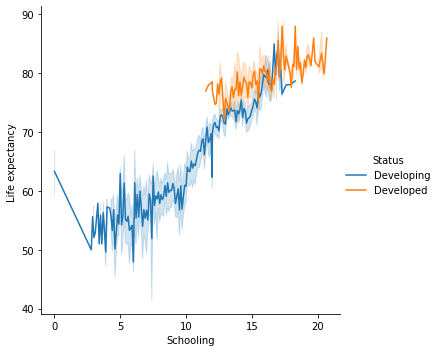

In [73]:
#Plot showing the relationship between life expectancy, schooling and status
plt.figure(figsize=(10, 6))
sns.relplot(data=plot_df, kind="line",x="Schooling", y="Life expectancy ", hue="Status",)

plt.show()

<Figure size 720x432 with 0 Axes>

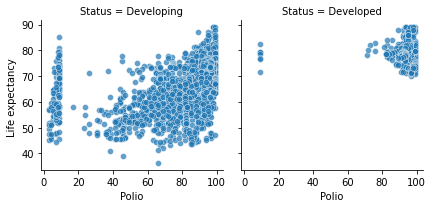

In [74]:
#Immunization of polio in developed and developing countries
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(plot_df, col="Status")
g.map(sns.scatterplot, "Polio", "Life expectancy ", alpha=.7)
g.add_legend()

plt.show()

<Figure size 720x432 with 0 Axes>

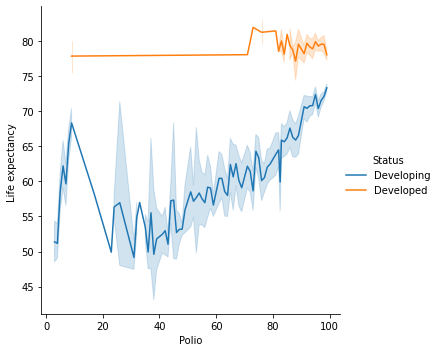

In [75]:
#Plot showing the relationship between life expectancy, polio and status
plt.figure(figsize=(10, 6)) 
sns.relplot(data=plot_df, kind="line",x="Polio", y="Life expectancy ", hue="Status",)

plt.show()